## Importing the essential libraries over here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Importing the dataset over here

In [2]:
data=pd.read_csv("customer_churn_data.csv")

In [3]:
data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


## Taking care of missing values if present over here or not

In [4]:
data.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [5]:
missing_values=[feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in missing_values:
  print(feature)

InternetService


In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


## Taking care of duplicate observations if present over here or not

In [8]:
data.duplicated().sum()

0

## Checking whether the dataset is imbalanced or not over here

In [10]:
data["Churn"].value_counts()

,count
Churn,
Yes,586
No,117


## Filtering all the numerical features over here

In [11]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!="O"]
for feature in numerical_features:
  print(feature)

CustomerID
Age
Tenure
MonthlyCharges
TotalCharges


In [12]:
data[numerical_features]

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
5,6,42,16,119.75,1916.00
...,...,...,...,...,...
991,992,24,32,81.93,2621.76
993,994,38,4,102.27,409.08
994,995,34,1,78.63,78.63
995,996,42,41,37.14,1522.74


## Filtering all the categorical features over here

In [13]:
cat_features=[feature for feature in data.columns if data[feature].dtype=="O"]
for feature in cat_features:
  print(feature)

Gender
ContractType
InternetService
TechSupport
Churn


In [15]:
data[cat_features]

,Gender,ContractType,InternetService,TechSupport,Churn
0,Male,Month-to-Month,Fiber Optic,Yes,Yes
1,Male,Month-to-Month,Fiber Optic,Yes,Yes
2,Female,Month-to-Month,Fiber Optic,No,Yes
3,Female,One-Year,DSL,Yes,Yes
5,Female,Two-Year,DSL,Yes,Yes
...,...,...,...,...,...
991,Male,Month-to-Month,Fiber Optic,Yes,Yes
993,Male,One-Year,Fiber Optic,No,Yes
994,Female,Month-to-Month,DSL,No,Yes
995,Male,Month-to-Month,Fiber Optic,Yes,Yes


## Encoding all the categorical features over here

In [16]:
for feature in cat_features:
  feature_mapping={category:index for index,category in enumerate(data[feature].unique())}
  data[feature]=data[feature].map(feature_mapping)

In [17]:
data

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,0,4,88.35,0,0,353.40,0,0
1,2,43,0,0,36.67,0,0,0.00,0,0
2,3,51,1,2,63.79,0,0,127.58,1,0
3,4,60,1,8,102.34,1,1,818.72,0,0
5,6,42,1,16,119.75,2,1,1916.00,0,0
...,...,...,...,...,...,...,...,...,...,...
991,992,24,0,32,81.93,0,0,2621.76,0,0
993,994,38,0,4,102.27,1,0,409.08,1,0
994,995,34,1,1,78.63,0,1,78.63,1,0
995,996,42,0,41,37.14,0,0,1522.74,0,0


## Creating the features and labels over here

In [20]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Splitting the dataset into training set and testing set to avoid the problem of overfitting over here

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the model on the training dataset over here

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Evaluating the performance of the model on the testing dataset over here

In [24]:
y_pred=classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix:
 [[112   0]
 [  1  28]]
Accuracy Score: 0.9929078014184397
AUC Score: 0.9827586206896552


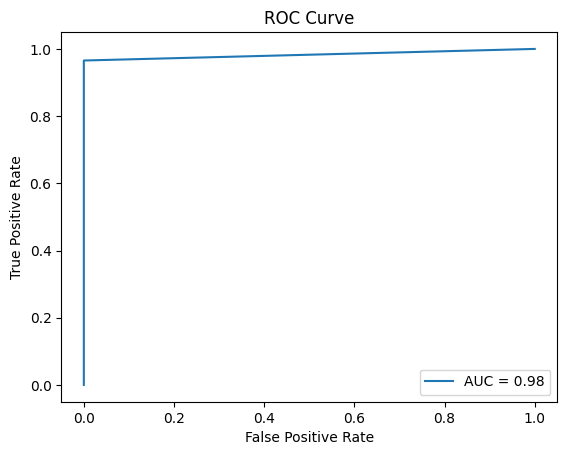

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# AUC Score (Assuming y_pred_prob is the predicted probability from your model)
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc)

# Plotting ROC Curve (Optional)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
